In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/ToyotaCorolla.csv', encoding='latin1' )

In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
data1 = pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis = 1)
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
data2 = data1.rename({'Age_08_04':'Age'},axis=1)

In [7]:
data2[data2.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [8]:
toyo = data2.drop_duplicates().reset_index(drop = True)

In [9]:
toyo.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [10]:
toyo.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


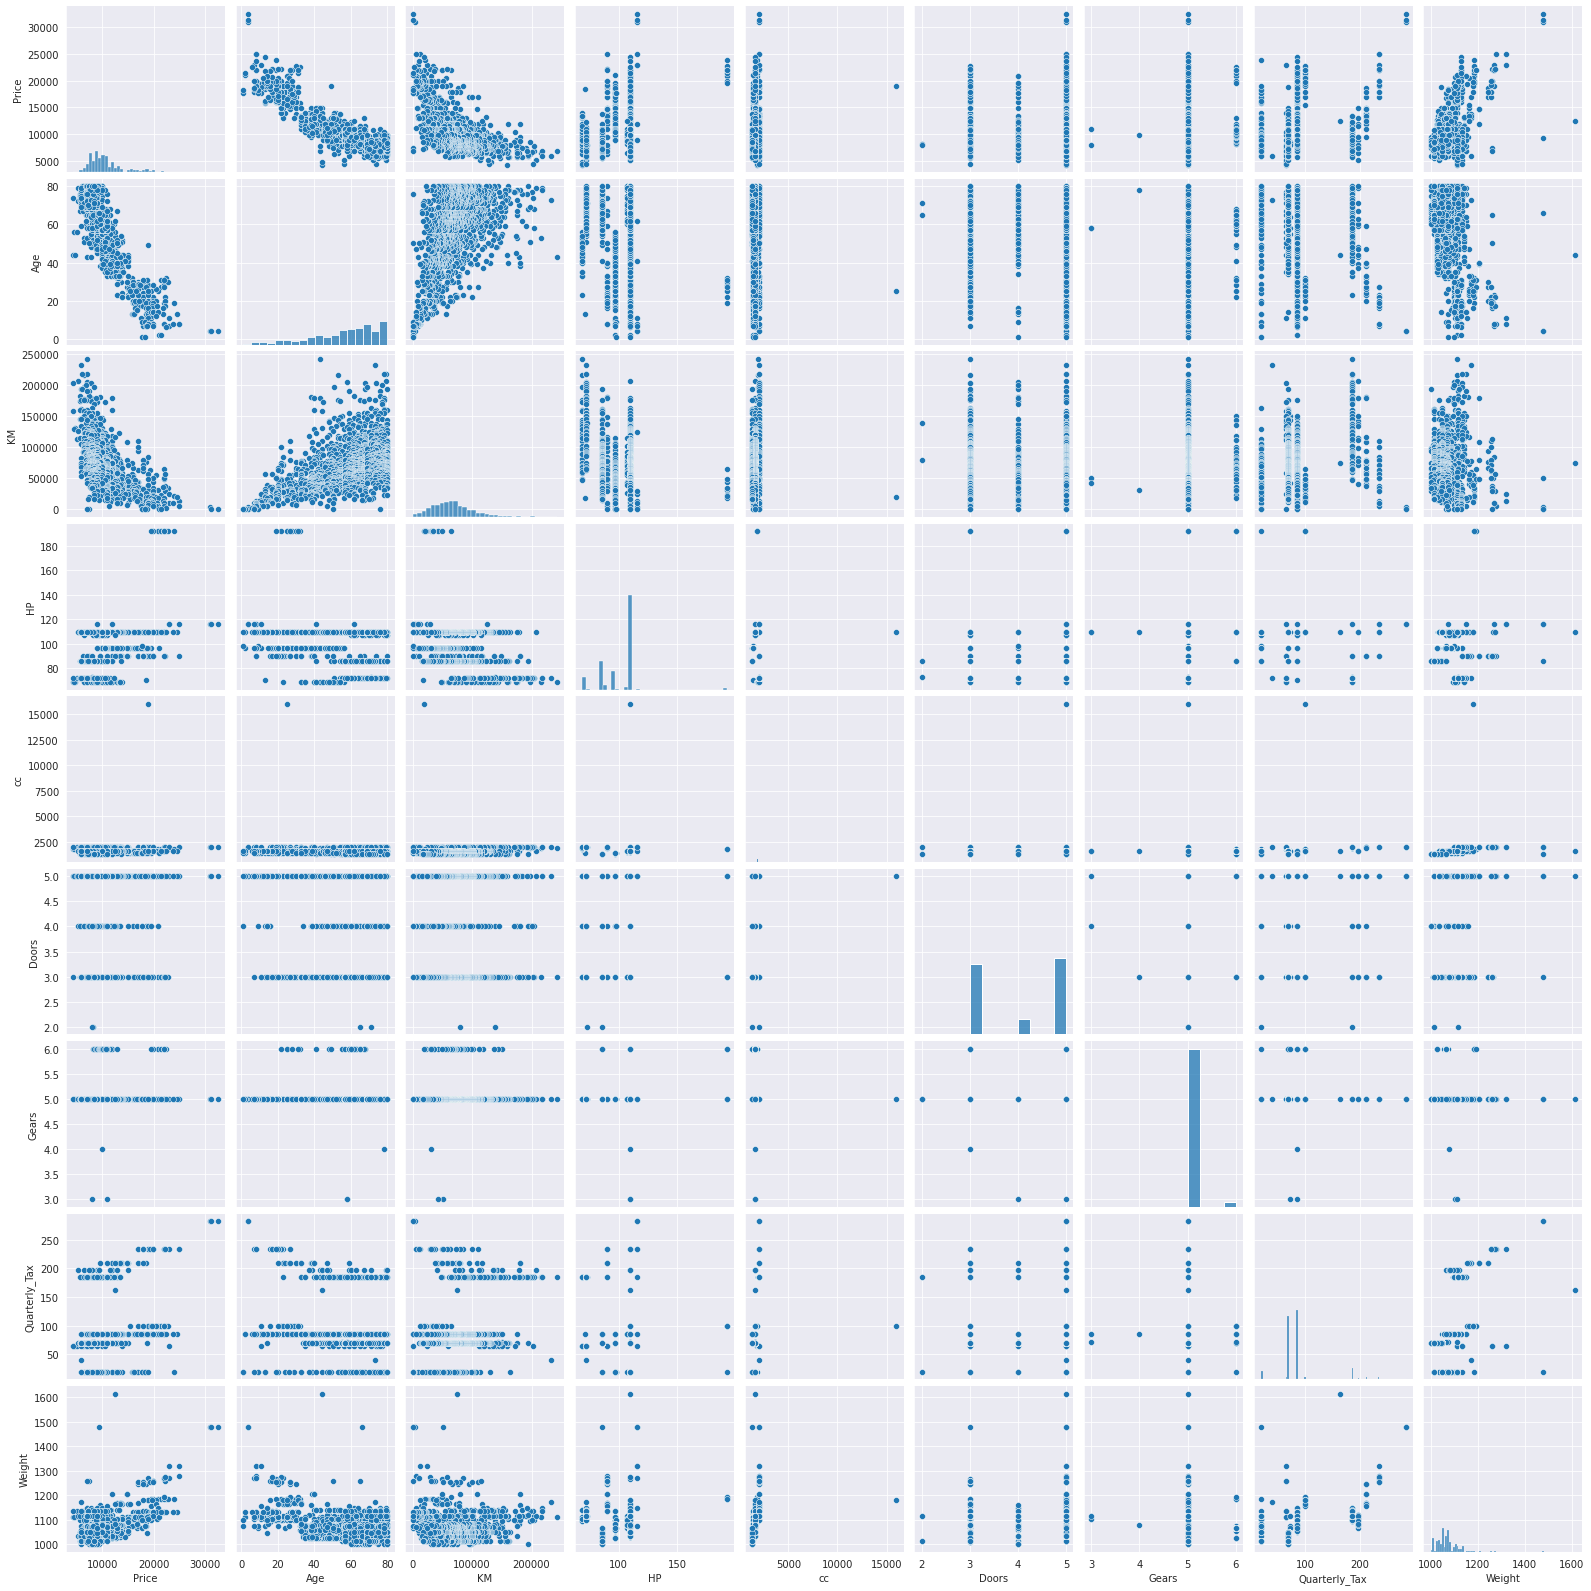

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo)

## Model

In [13]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = toyo).fit()

In [14]:
model

In [15]:
model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [16]:
# t and p value
model.tvalues , np.round(model.pvalues,5)

(Intercept        -3.875273
 Age             -46.551876
 KM              -16.552424
 HP               11.209719
 cc               -1.316436
 Doors            -0.023012
 Gears             3.034563
 Quarterly_Tax     2.944198
 Weight           15.760663
 dtype: float64, Intercept        0.00011
 Age              0.00000
 KM               0.00000
 HP               0.00000
 cc               0.18824
 Doors            0.98164
 Gears            0.00245
 Quarterly_Tax    0.00329
 Weight           0.00000
 dtype: float64)

In [17]:
print(model.tvalues,'\n' , model.pvalues)

Intercept        -3.875273
Age             -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age              1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [18]:
(model.rsquared, model.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:56:53   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#Simple linear regression 
slr_c = smf.ols('Price~cc',data = toyo).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64, Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [21]:
slr_d = smf.ols('Price~Doors',data = toyo).fit()
slr_d.tvalues , slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64, Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [22]:
mlr_cd = smf.ols('Price~cc+Doors',data = toyo).fit()
mlr_cd.tvalues , mlr_cd.pvalues

(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64, Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

## VIF

In [23]:
toyo.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [31]:
rsq_a = smf.ols('Age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = toyo).fit().rsquared
vif_a = 1/(1-rsq_a) 

rsq_k = smf.ols('KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = toyo).fit().rsquared
vif_k = 1/(1-rsq_k) 

rsq_h = smf.ols('HP~KM+Age+cc+Doors+Gears+Quarterly_Tax+Weight', data = toyo).fit().rsquared
vif_h = 1/(1-rsq_h) 

rsq_c = smf.ols('cc~HP+KM+Age+Doors+Gears+Quarterly_Tax+Weight', data = toyo).fit().rsquared
vif_c = 1/(1-rsq_c) 

rsq_d = smf.ols('Doors~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight', data = toyo).fit().rsquared
vif_d = 1/(1-rsq_d) 

rsq_g = smf.ols('Gears~Age+KM+HP+cc+Doors+Quarterly_Tax+Weight', data = toyo).fit().rsquared
vif_g = 1/(1-rsq_g) 

rsq_q = smf.ols('Quarterly_Tax~Age+KM+HP+cc+Doors+Gears+Weight', data = toyo).fit().rsquared
vif_q = 1/(1-rsq_q) 

rsq_w = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax', data = toyo).fit().rsquared
vif_w = 1/(1-rsq_w)

dl = {'Variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_a,vif_k,vif_h,vif_c,vif_d,vif_g,vif_q,vif_w]}
vif_frame = pd.DataFrame(dl)
vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


## Residual analysis

Text(0.5, 1.0, 'normal Q-Q plot of residuals')

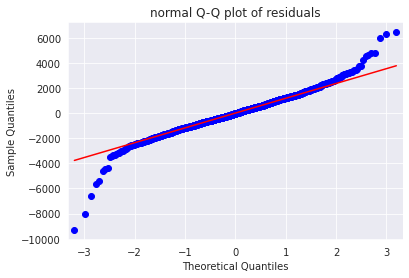

In [32]:
import statsmodels.api as sm
sm.qqplot(model.resid,line = 'q')
plt.title('normal Q-Q plot of residuals')

In [33]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [34]:
def get_standardized_values(vals) : return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standard residual value')

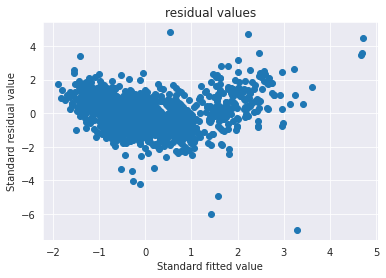

In [35]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('residual values')
plt.xlabel('Standard fitted value')
plt.ylabel('Standard residual value')

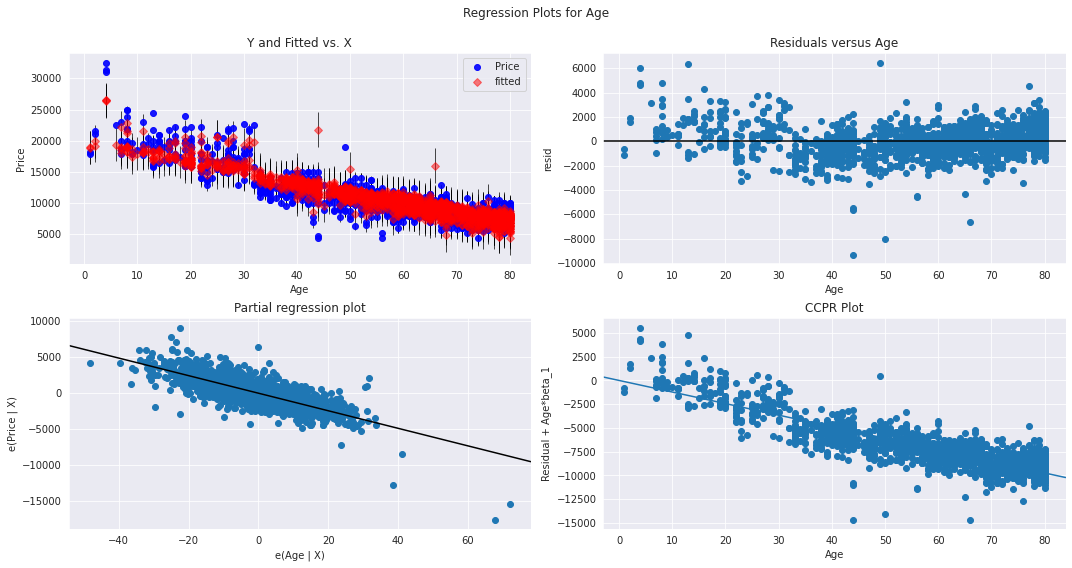

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Age',fig = fig)

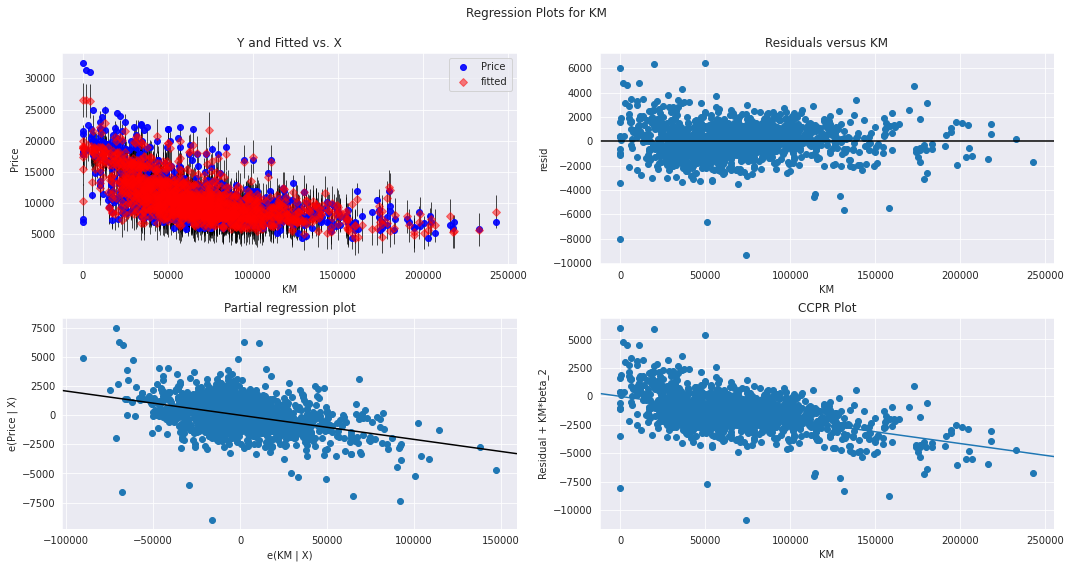

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'KM',fig = fig)

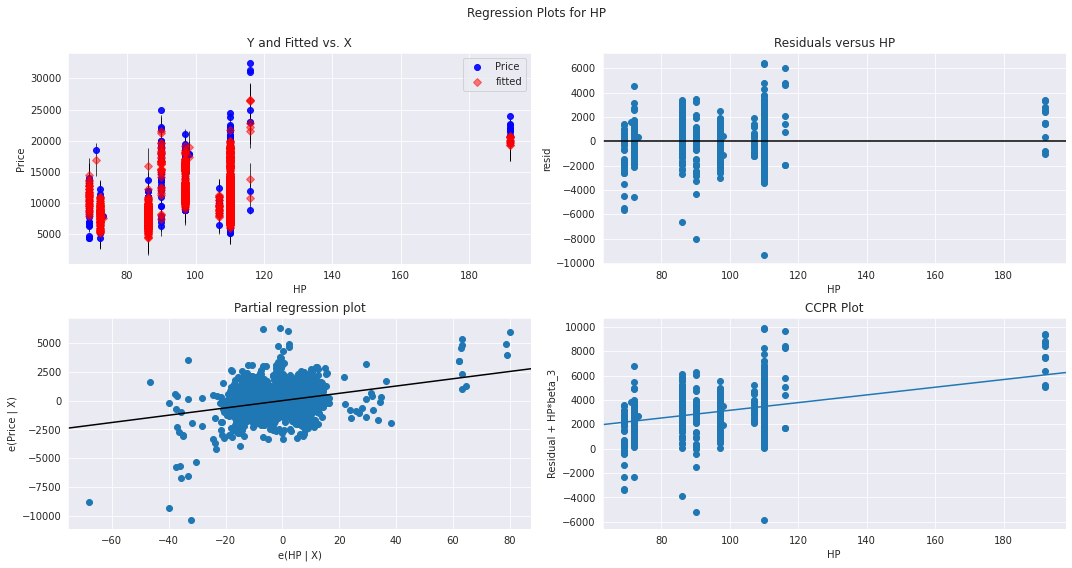

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'HP',fig = fig)

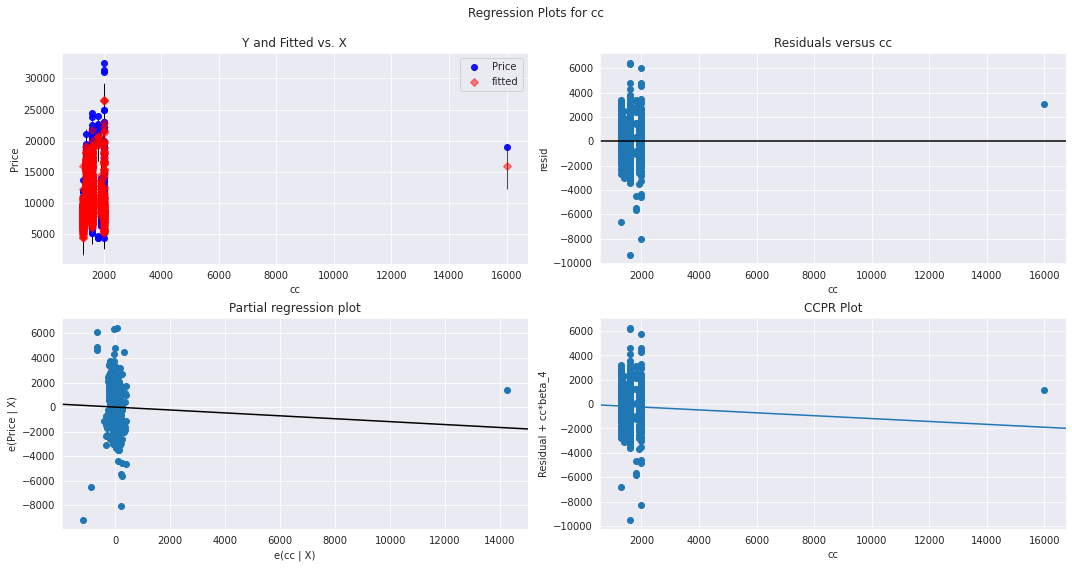

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'cc',fig = fig)

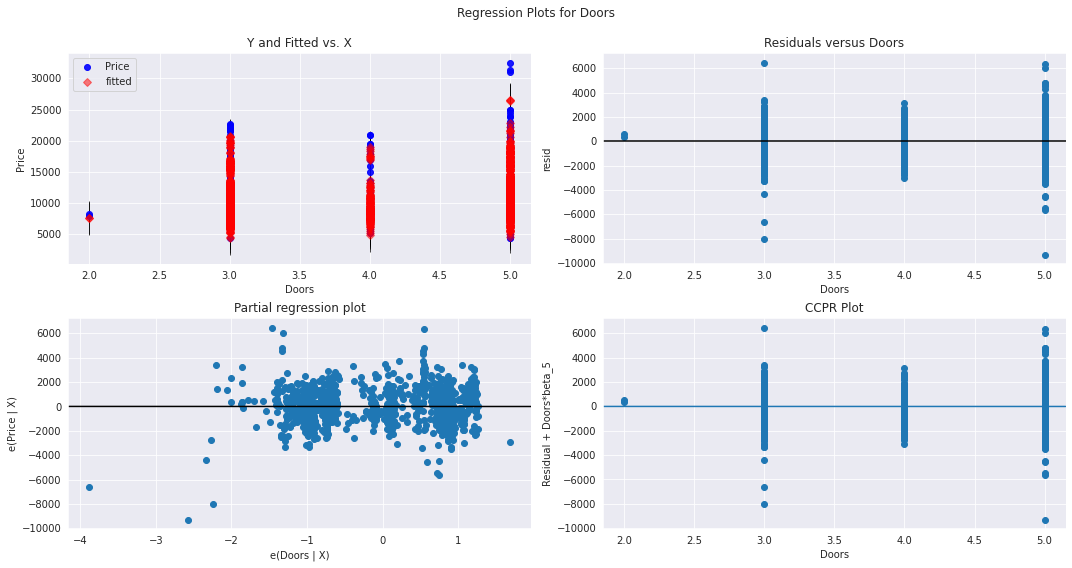

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Doors',fig = fig)

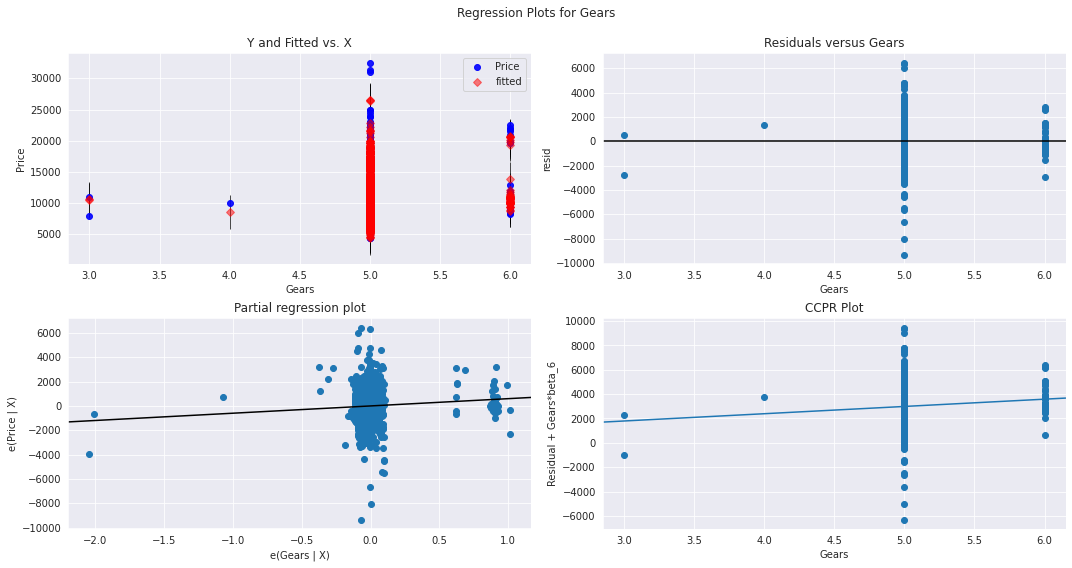

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Gears',fig = fig)

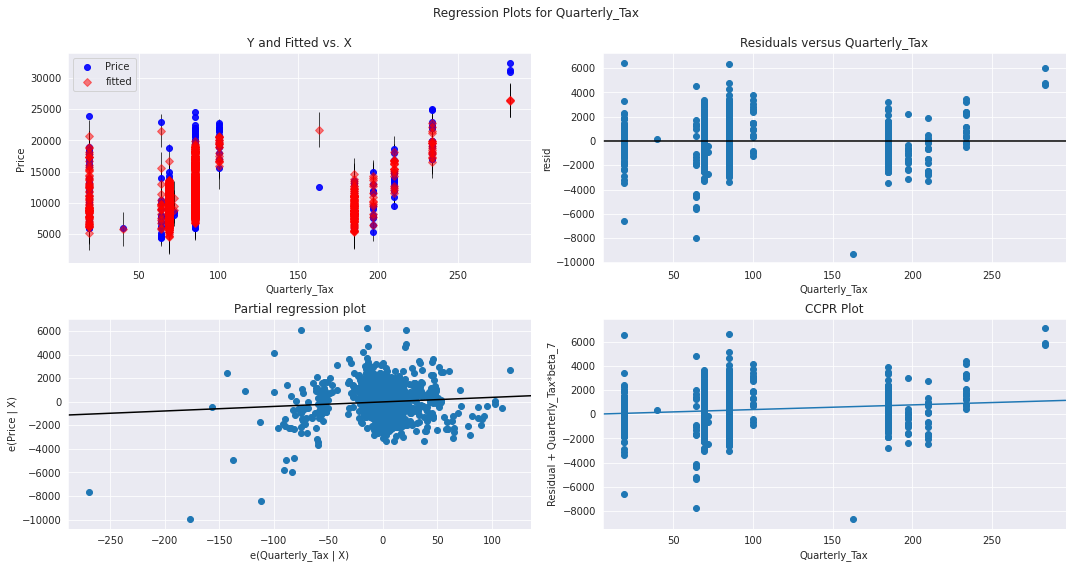

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig = fig)

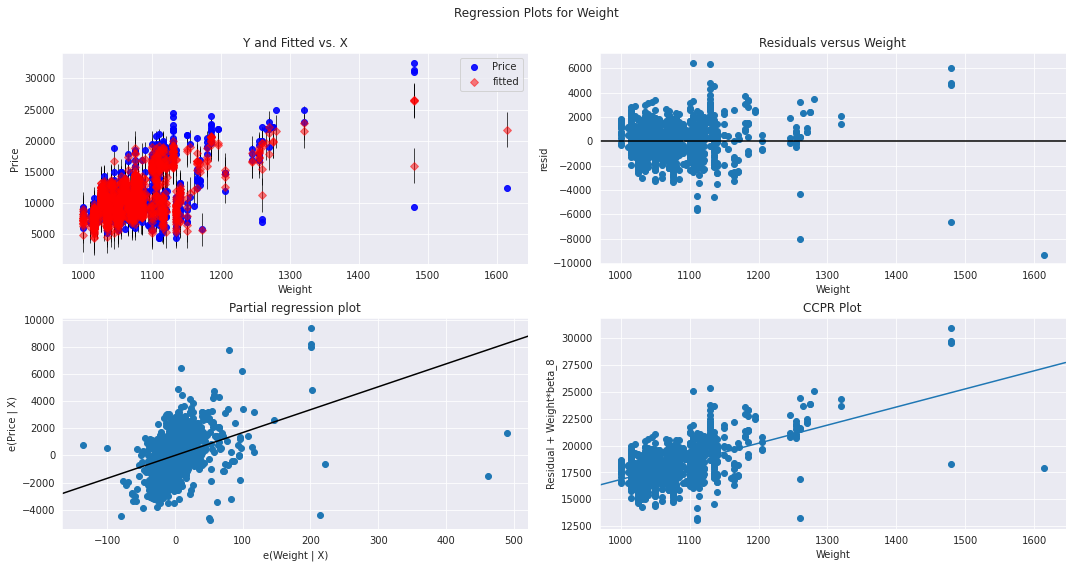

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Weight',fig = fig)

## Cooks distance

In [45]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


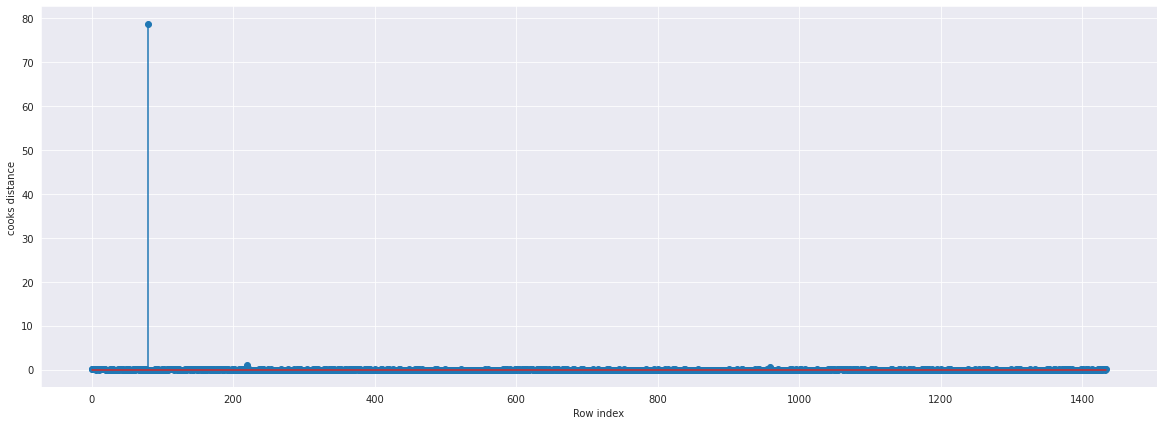

In [46]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyo)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [47]:
(np.argmax(c),np.max(c))

(80, 78.72950582258927)

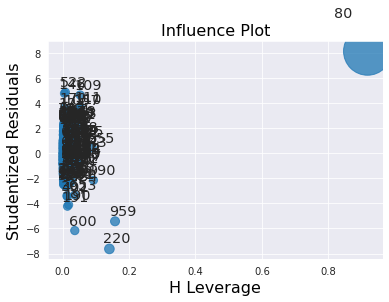

In [48]:
# high influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [49]:
k = toyo.shape[1]
n = toyo.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [50]:
leverage_cutoff

0.020905923344947737

In [53]:
toyo[toyo.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [68]:
toyo1 = toyo.drop(toyo.index[[80]],axis = 0).reset_index(drop=True)

In [69]:
toyo1[toyo1.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,17250,29,20000,110,1600,5,5,85,1115


In [70]:
# model
final_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = toyo1).fit()
final_model

In [71]:
final_model.rsquared,final_model.aic

(0.8681163912634053, 24669.363894157)

In [72]:
# cooks distance 
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

## model predictions

In [80]:
new_data = pd.DataFrame({'Age':21,'KM':40000,'HP':85,'cc':1900,'Doors':4,'Gears':5,'Quarterly_Tax':100,'Weight':1050 }, index=[0])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1 non-null      int64
 1   KM             1 non-null      int64
 2   HP             1 non-null      int64
 3   cc             1 non-null      int64
 4   Doors          1 non-null      int64
 5   Gears          1 non-null      int64
 6   Quarterly_Tax  1 non-null      int64
 7   Weight         1 non-null      int64
dtypes: int64(8)
memory usage: 72.0 bytes


In [81]:
new_data

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,21,40000,85,1900,4,5,100,1050


In [82]:
final_model.predict(new_data)

0    13616.404284
dtype: float64

In [83]:
result =final_model.predict(toyo1)
result

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64